In [105]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

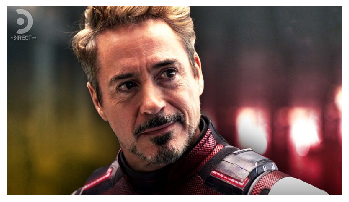

In [116]:
path = "Robert-Downey-Jr-Avengers-Endgame.jpg"
# Loading the image
img = cv2.imread(path)
img2 = cv2.imread(path)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

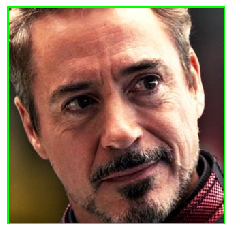

In [117]:
# Converting the image into grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Creating variable faces
faces= face_cascade.detectMultiScale (gray, 1.3, 5)
# Defining and drawing the rectangle around the face
for(x , y,  w,  h) in faces:
    cv2.rectangle(img, (x,y) ,(x+w, y+h), (0,255,0), 3)
# Creating two regions of interest
roi_gray=gray[y:(y+h), x:(x+w)]
roi_color=img[y:(y+h), x:(x+w)]

plt.axis("off")
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.show()

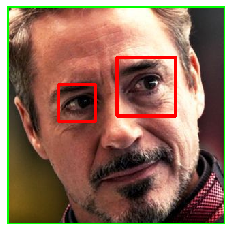

In [118]:
# Creating variable eyes
eyes = eye_cascade.detectMultiScale(roi_gray, 1.3,  5)
index=0
# Creating for loop in order to divide one eye from another
for (ex , ey,  ew,  eh) in eyes:
    if index == 0:
        eye_1 = (ex, ey, ew, eh)
    elif index == 1:
        eye_2 = (ex, ey, ew, eh)
    elif index == 2:
        break
    # Drawing rectangles around the eyes
    cv2.rectangle(roi_color, (ex,ey) ,(ex+ew, ey+eh), (0,0,255), 3)
    index = index + 1

plt.axis("off")
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.show()

In [119]:
if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

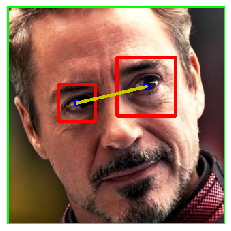

In [120]:
# Calculating coordinates of a central points of the rectangles
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]
 
cv2.circle(roi_color, left_eye_center, 5, (255, 0, 0) , -1)
cv2.circle(roi_color, right_eye_center, 5, (255, 0, 0) , -1)
cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),3)

plt.axis("off")
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.show()

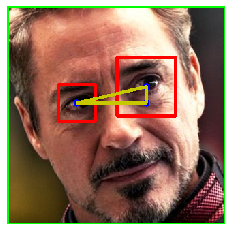

In [121]:
if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
    # Integer -1 indicates that the image will rotate in the clockwise direction
    direction = -1 
else:
    A = (left_eye_x, right_eye_y)
      # Integer 1 indicates that image will rotate in the counter clockwise  
      # direction
    direction = 1 

cv2.circle(roi_color, A, 5, (255, 0, 0) , -1)
 
cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),3)
cv2.line(roi_color,left_eye_center, A,(0,200,200),3)
cv2.line(roi_color,right_eye_center, A,(0,200,200),3)

plt.axis("off")
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.show()

In [122]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y
angle=np.arctan(delta_y/delta_x)
angle = (angle * 180) / np.pi
print(angle)

-13.240519915187205


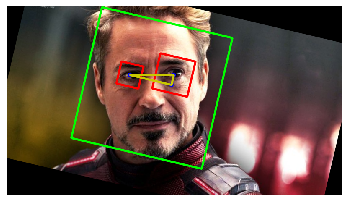

In [123]:
# Width and height of the image
h, w = img.shape[:2]
# Calculating a center point of the image
# Integer division "//"" ensures that we receive whole numbers
center = (w // 2, h // 2)
# Defining a matrix M and calling
# cv2.getRotationMatrix2D method
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
# Applying the rotation to our image using the
# cv2.warpAffine method
rotated = cv2.warpAffine(img, M, (w, h))
img2 = cv2.warpAffine(img2 , M , (w,h))
rotated_gray = cv2.warpAffine(gray , M , (w,h))


plt.axis("off")
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

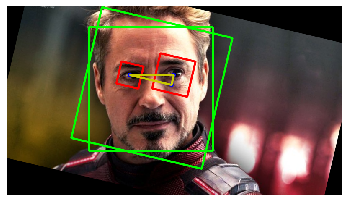

In [124]:
faces= face_cascade.detectMultiScale (rotated_gray, 1.3, 5)
# Defining and drawing the rectangle around the face
for(x , y,  w,  h) in faces:
    cv2.rectangle(rotated, (x,y) ,(x+w, y+h), (0,255,0), 3)
# Creating two regions of interest
roi_gray=gray[y:(y+h), x:(x+w)]
roi_color= rotated[y:(y+h), x:(x+w)]
final = img2[y:(y+h), x:(x+w)]

plt.axis("off")
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

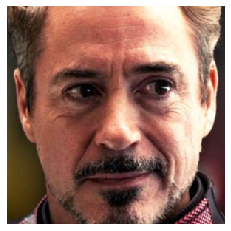

In [125]:
plt.axis("off")
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.show()